In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import lmdiag

In [3]:
auto = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Auto.csv', na_values='?').dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [4]:
auto.select_dtypes(include='object').columns.values

array(['name'], dtype=object)

In [5]:
auto.select_dtypes(exclude='object').columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'], dtype=object)

a) Produce a scatterplot matrix which includes all of the variables in the data set.

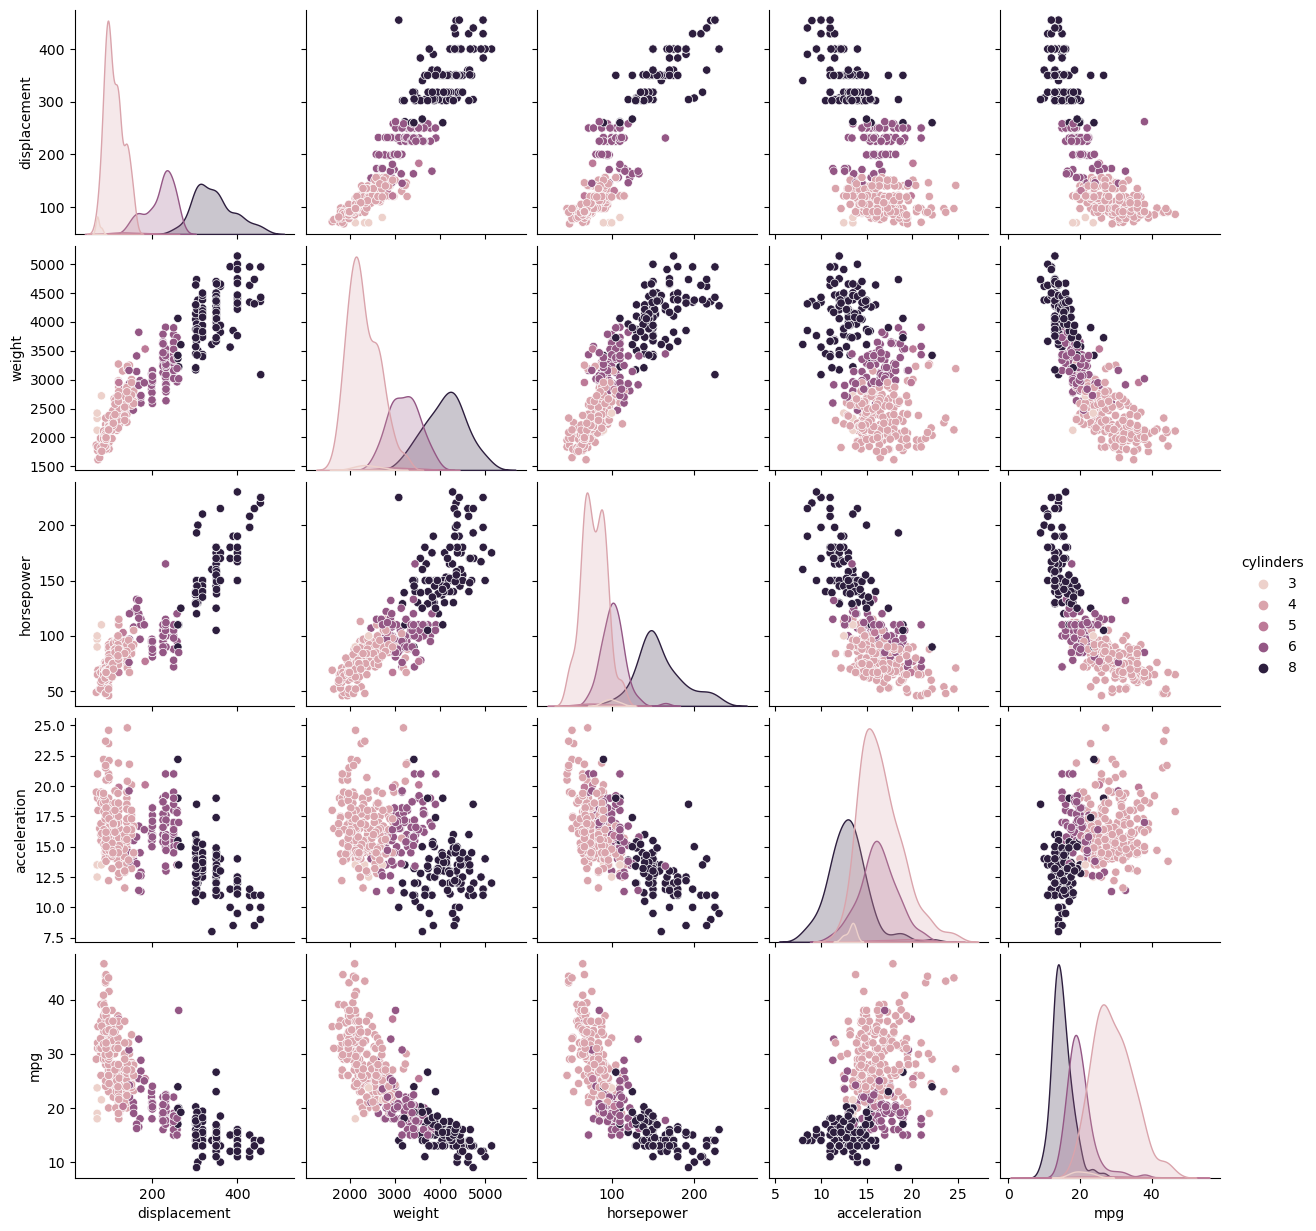

In [6]:
sns.pairplot(auto, vars=['displacement', 'weight', 'horsepower', 'acceleration', 'mpg'], hue='cylinders')

b) Compute the matrix of correlations between the variables. You will need to exclude the “name” variable, which is qualitative

In [7]:
auto.drop(["mpg", "name"], axis=1).apply(lambda x: x.corr(auto.mpg))

cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
origin          0.565209
dtype: float64

In [9]:
corr = auto.corr()
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

C:\Users\Arman\AppData\Local\Temp\ipykernel_9300\3312815112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = auto.corr()


c) Perform a multiple linear regression with “mpg” as the response and all other variables except “name” as the predictors. Comment on the output:

I. Is there a relationship between the predictors and the response?

II. Which predictors appear to have a statistically significant relationship to the response?

III.What does the coefficient for the “year” variable suggest?

In [10]:
auto.drop(axis=1, columns=["name"], inplace=True)

In [12]:
auto_reg = smf.ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",auto).fit()
print(auto_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          2.04e-139
Time:                        22:45:44   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit

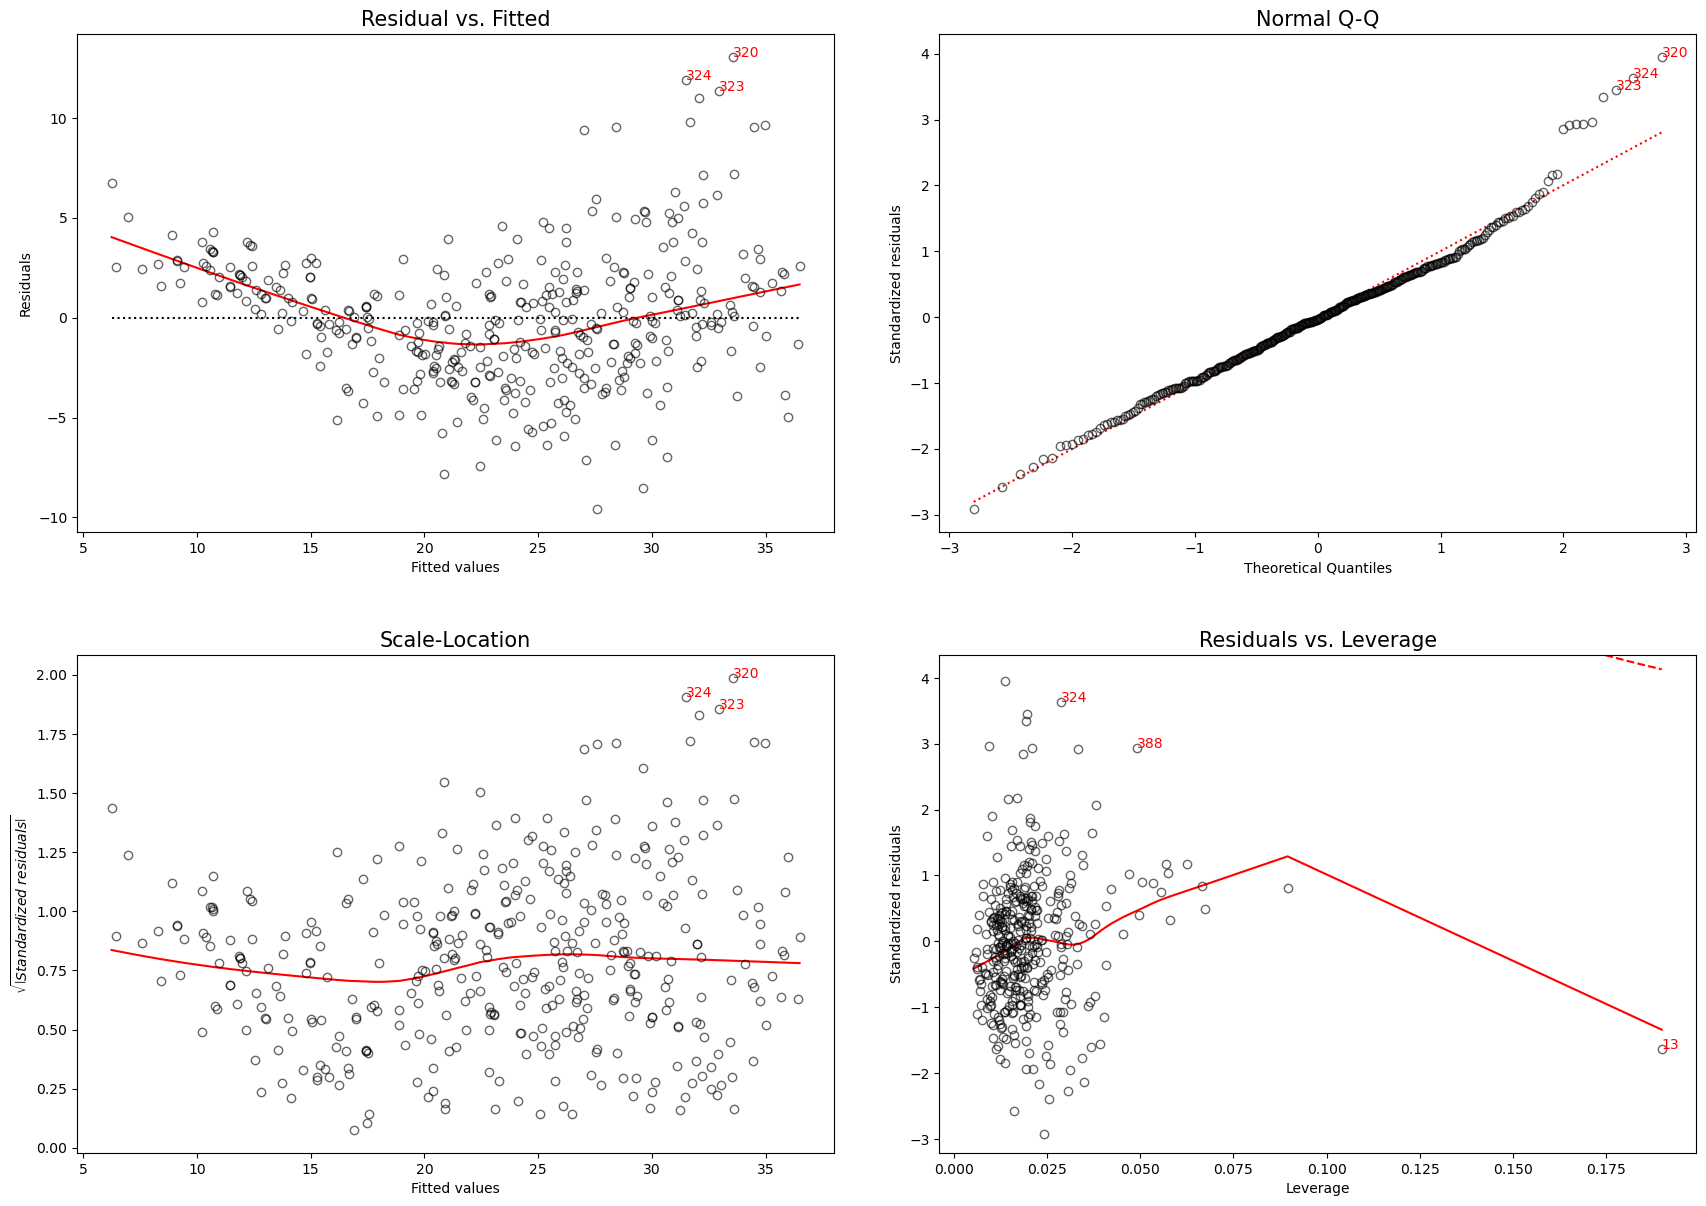

In [13]:
plt.figure(figsize = (17,12))
lmdiag.plot(auto_reg)
plt.show()